## Importing Dependencies

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV

import joblib

from sklearn.metrics import accuracy_score

In [47]:
# importing the dataset

data = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Analysis and Visualization

In [48]:
print("Data Shape:", data.shape)

def check_null(data):
    for i in data.isnull().sum():
        if data.isnull().sum()[i]!=0:
            return print("Data contains Null values.")
    return print("Data is Clean of Null values.")


def check_NA(data):
    for i in data.isna().sum():
        if data.isna().sum()[i]!=0:
            return print("Data contains Null.")
    return print("Data is Clean of NA.")

check_null(data)
check_NA(data)

Data Shape: (1470, 35)
Data is Clean of Null values.
Data is Clean of NA.


In [49]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot: >

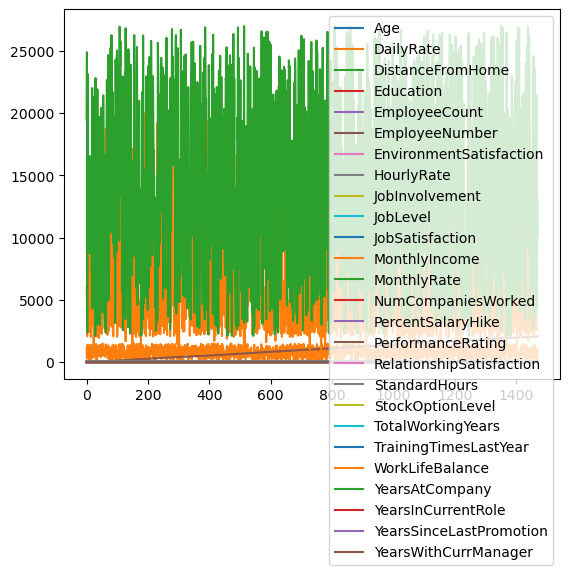

In [50]:
data.plot(subplots=False)

<AxesSubplot: ylabel='Frequency'>

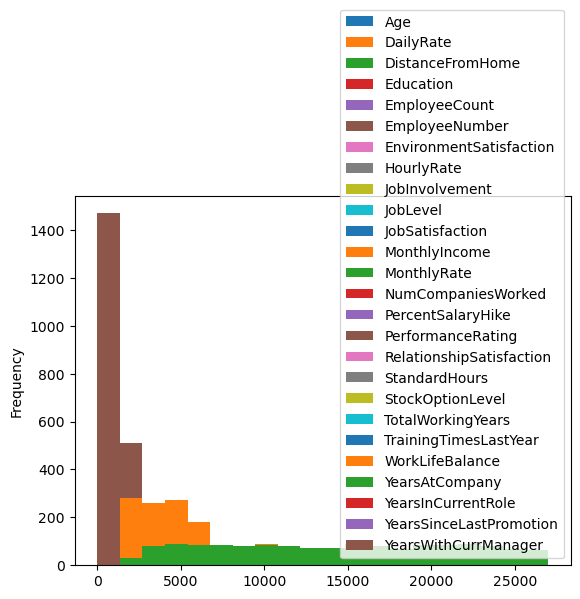

In [51]:
data.plot.hist(bins=20)

##### We can see the data is quite varying in scale. We will need to normalize it.

## Train and Test Split


In [52]:
X = data.drop(['Attrition'], axis=1)
y = data.loc[:, 'Attrition']
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1323, 34)
(1323,)
(147, 34)
(147,)


## Data Preprocessing and Feature Engineering

##### Using Label Encoding to convert categorical values to numerical values

In [55]:
label_encoder = LabelEncoder()

# For all columns with string input, label encode them
for column in x_train.columns:
    if x_train[column].dtype == 'object':
        x_train[column] = label_encoder.fit_transform(x_train[column])
        x_test[column] = label_encoder.transform(x_test[column])

x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
915,21,1,251,1,10,2,1,1,1279,1,...,3,80,0,2,2,1,2,2,2,2
101,32,2,827,1,1,1,1,1,134,4,...,4,80,0,1,2,3,1,0,0,0
107,25,2,240,2,5,3,2,1,142,3,...,4,80,0,6,1,3,6,4,0,3
306,32,2,906,2,7,3,1,1,420,4,...,3,80,1,13,3,2,13,8,4,8
1031,46,2,377,2,9,3,2,1,1457,1,...,1,80,1,28,1,4,7,7,4,3


#### The data is very unbalanced, using SMOTE to rebalance it

In [56]:
# Display the class distribution before resampling
print("Class distribution before resampling:")
print(y_train.value_counts())

Class distribution before resampling:
No     1109
Yes     214
Name: Attrition, dtype: int64


In [57]:
# not used since it reduced accuracy and introduced overfitting to the model

smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(x_train, y_train)

In [58]:
print(y_train.value_counts())

No     1109
Yes     214
Name: Attrition, dtype: int64


In [59]:
# Used to create the heatmap

label_encoder = LabelEncoder()
labelled_data = data.copy()

for column in labelled_data.columns:
    if labelled_data[column].dtype == 'object':
        labelled_data[column] = label_encoder.fit_transform(labelled_data[column])

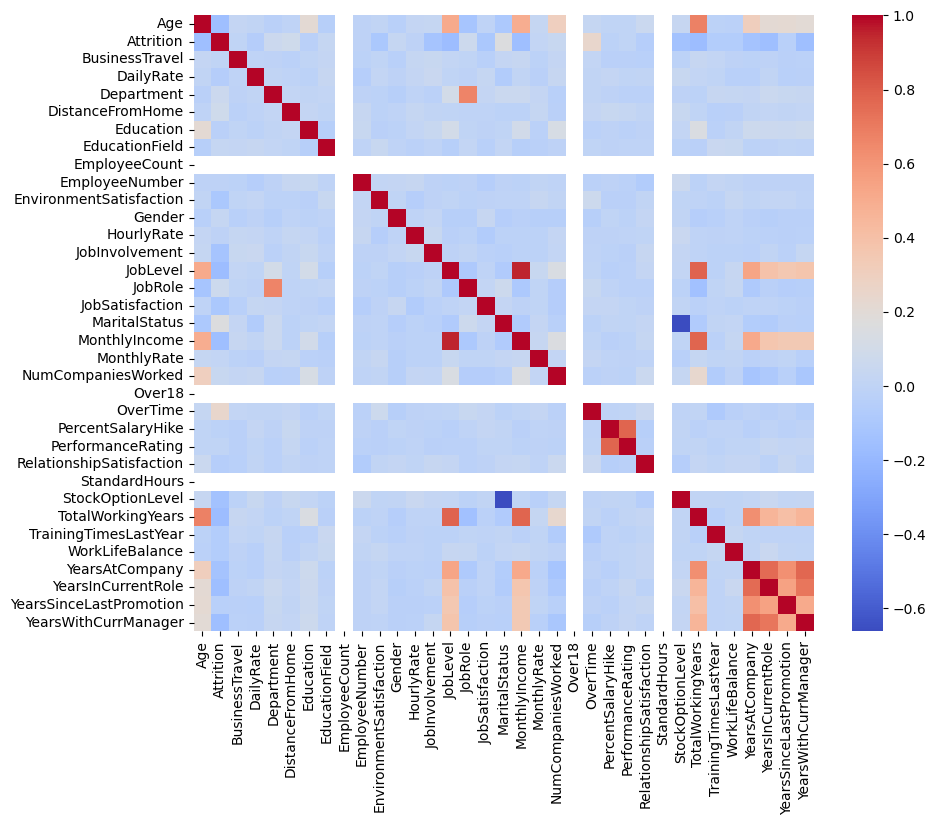

In [60]:
plt.figure(figsize=(10, 8))

correlation_matrix = labelled_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot_kws={"size": 12})
plt.show()

In [61]:
# Label Encoding for target data cuz XGB Classifier is petty :c

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

##### Using chi-squared as the scoring function in feature engineering utlizing SelectKBest in scikit-learn.

In [62]:
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x_train, y_train)

In [63]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['l1', 'l2']
featureScores

,l1,l2
0,Age,75.866014
1,BusinessTravel,0.037194
2,DailyRate,622.986263
3,Department,1.518140
4,DistanceFromHome,29.446980
5,Education,0.439884
6,EducationField,1.323790
7,EmployeeCount,0.000000
8,EmployeeNumber,55.066685
9,EnvironmentSatisfaction,4.361066


In [64]:
selected_list = featureScores.iloc[:, 1] < 1
indx = []

for i in range(len(selected_list)):
    if selected_list[i] == False:
        indx.append(i)
        featureScores = featureScores.drop(i, axis=0)

featureScores

,l1,l2
1,BusinessTravel,0.037194
5,Education,0.439884
7,EmployeeCount,0.000000
10,Gender,0.509035
11,HourlyRate,0.529757
22,PercentSalaryHike,0.008254
23,PerformanceRating,0.005985
24,RelationshipSatisfaction,0.269484
25,StandardHours,0.000000
29,WorkLifeBalance,0.975479


##### We can infer from the above analysis that EmployeeCount. Over18 and StandardHours do not have any effect on the Attrition outcome. There are other values which have almost negligible effect on our model, we decide to ignore all features which have score less than 1.

In [65]:
# bad_list = ['Over18', 'StandardHours', 'EmployeeCount', 'Over18']
bad_list = featureScores.l1

x_train1 = x_train.drop(bad_list, axis=1)
x_test1 = x_test.drop(bad_list, axis=1)

x_train1.head()

,Age,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,NumCompaniesWorked,Over18,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
915,21,251,1,10,1,1279,1,2,1,2,...,1,0,0,0,2,2,2,2,2,2
101,32,827,1,1,1,134,4,3,1,6,...,1,0,0,0,1,2,1,0,0,0
107,25,240,2,5,2,142,3,2,2,7,...,1,0,1,0,6,1,6,4,0,3
306,32,906,2,7,1,420,4,2,2,7,...,1,0,0,1,13,3,13,8,4,8
1031,46,377,2,9,2,1457,1,3,3,7,...,4,0,0,1,28,1,7,7,4,3


##### Using Standard type of scaling to normalize out data distribution.

In [66]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train1)
X_test_sc = sc.transform(x_test1)

## Model Selection

In [67]:
print(X_train_sc.shape)
print(y_train.shape)
print(X_test_sc.shape)
print(y_test.shape)

(1323, 24)
(1323,)
(147, 24)
(147,)


In [68]:
# Function to return training accuracy and testing accuracy given a defined model

def modelAccuracyGenerator(model):
    model.fit(X_train_sc, y_train)
    acc1 = accuracy_score(model.predict(X_train_sc), y_train)
    acc2 = accuracy_score(model.predict(X_test_sc), y_test)
    return acc1, acc2

In [69]:
train_acc1, test_acc1 = modelAccuracyGenerator(model=LogisticRegression(random_state=0))
train_acc2, test_acc2 = modelAccuracyGenerator(model=KNeighborsClassifier())
train_acc3, test_acc3 = modelAccuracyGenerator(model=Perceptron(random_state=0))
train_acc4, test_acc4 = modelAccuracyGenerator(model=MLPClassifier(random_state=0))
train_acc5, test_acc5 = modelAccuracyGenerator(model=DecisionTreeClassifier(random_state=0))
train_acc6, test_acc6 = modelAccuracyGenerator(model=RandomForestClassifier(random_state=0))
train_acc7, test_acc7 = modelAccuracyGenerator(model=AdaBoostClassifier(random_state=0))
train_acc8, test_acc8 = modelAccuracyGenerator(model=SVC(random_state=0))
train_acc9, test_acc9 = modelAccuracyGenerator(model=xgb.XGBClassifier(random_state=0))

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

In [70]:
models_accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Perceptron',
              'MLP', 'Decision Tree', 'Random Forest',
              'AdaBoost', 'SVM', 'XGBoost'],
    'Train_Acc': [train_acc1, train_acc2, train_acc3,
                  train_acc4, train_acc5, train_acc6,
                  train_acc7, train_acc8, train_acc9],
    'Test_Acc': [test_acc1, test_acc2, test_acc3,
                 test_acc4, test_acc5, test_acc6,
                 test_acc7, test_acc8, test_acc9]
})

# Sorting by Test Accuracies
models_sorted = models_accuracies.sort_values(by='Test_Acc', ascending=False)
models_sorted

,Model,Train_Acc,Test_Acc
7,SVM,0.897203,0.877551
0,Logistic Regression,0.869237,0.870748
3,MLP,0.954649,0.870748
5,Random Forest,1.000000,0.870748
8,XGBoost,1.000000,0.870748
1,KNN,0.875283,0.863946
6,AdaBoost,0.897203,0.857143
2,Perceptron,0.769463,0.809524
4,Decision Tree,1.000000,0.775510


### RandomForestClassifier Hyperparameter Tuning

In [ ]:
model1 = RandomForestClassifier(random_state=0)

In [ ]:
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5,25,50],
    'max_features': ['sqrt',0.5, 5],
    'min_samples_leaf': [1, 5, 11],
    'min_samples_split': [2, 8, 11],
    "criterion":['gini','entropy']
}

In [ ]:
grid = GridSearchCV(model1, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train_sc, y_train)

In [ ]:
best_params = grid.best_params_
best_rf_model = RandomForestClassifier(**best_params)
print(best_params)

In [ ]:
best_rf_model.fit(X_train_sc, y_train)
train__acc1, test__acc1 = modelAccuracyGenerator(best_rf_model)
print(train__acc1)
print(test__acc1)

### SVM Hyperparameter Tuning

In [ ]:
model2 = SVC(gamma='scale')

In [ ]:
rf_params = {
    'C': [0.1, 1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}


In [ ]:
grid = GridSearchCV(model2, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train_sc, y_train)

In [ ]:
print("SVM - Best Parameters:")
print(grid.best_params_)

In [ ]:
best_svm_model = grid.best_estimator_
best_svm_model.fit(X_train_sc, y_train)

train__acc2, test__acc2 = modelAccuracyGenerator(best_svm_model)
print(train__acc2)
print(test__acc2)

### XGB Hyperparameter Tuning

In [ ]:
model3 = xgb.XGBClassifier()

In [ ]:
params={
 "n_estimators"     : [1, 50, 100],
 "learning_rate"    : [0.001, 0.1],
 "min_child_weight" : [1, 4, 7],
 "gamma"            : [0.0, 0.1, 0.5],
 "colsample_bytree" : [0.3, 0.6, 0.9]
}

In [ ]:
grid_search = GridSearchCV(model3, param_grid=params, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_sc, y_train)

In [ ]:
print("XGBoost - Best Parameters:")
print(grid_search.best_params_)

In [ ]:
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_sc, y_train)
train__acc2, test__acc1 = modelAccuracyGenerator(best_xgb_model)
print(train__acc2)
print(test__acc1)

### MLP In-Depth Hyperparameter Tuning

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


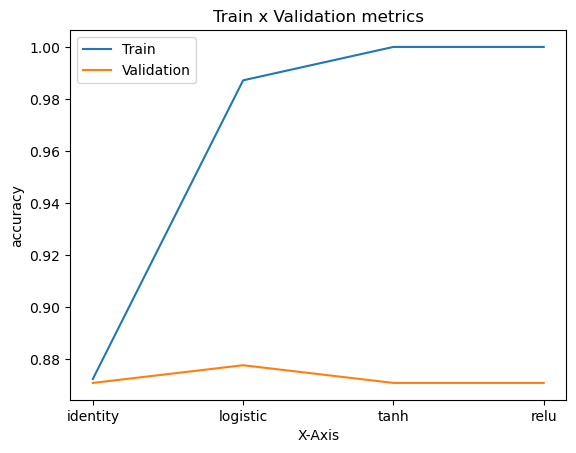

In [71]:
acts = ['identity', 'logistic', 'tanh', 'relu']

accuracy_list_train = []
accuracy_list_test = []

for i in acts:
    model = MLPClassifier(activation=i, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(acts)),labels=acts)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
slv = ['lbfgs', 'sgd', 'adam']

accuracy_list_train = []
accuracy_list_test = []

for i in slv:
    model = MLPClassifier(solver=i, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(slv)),labels=slv)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
apl = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 3]

accuracy_list_train = []
accuracy_list_test = []

for i in apl:
    model = MLPClassifier(alpha=i, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(apl)),labels=apl)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
lr = ['constant', 'invscaling', 'adaptive']

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = MLPClassifier(learning_rate=i, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(lr)),labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
tl = [1e-6, 1e-4, 1e-2, 0.1, 1, 2]

accuracy_list_train = []
accuracy_list_test = []

for i in tl:
    model = MLPClassifier(tol=i, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(tl)),labels=tl)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
hidden_layer_sizes_list = [(100,), (50,), (200,), (250,), (350,), (400,), (450)]

accuracy_list_train_hidden = []
accuracy_list_test_hidden = []

for hidden_size in hidden_layer_sizes_list:
    model = MLPClassifier(hidden_layer_sizes=hidden_size, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train_hidden.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test_hidden.append(accuracy_score(model.predict(X_test_sc), y_test))

plt.title('Train x Validation metrics (Hidden Layer Sizes)')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(hidden_layer_sizes_list)), labels=[str(hidden_size) for hidden_size in hidden_layer_sizes_list])
plt.plot(accuracy_list_train_hidden)
plt.plot(accuracy_list_test_hidden)
plt.legend(['Train', 'Validation'])

In [ ]:
batch_sizes = ['auto', 32, 64, 128, 256, 512, 1024]

accuracy_list_train_batch = []
accuracy_list_test_batch = []

for batch_size_val in batch_sizes:
    model = MLPClassifier(batch_size=batch_size_val, random_state=42, max_iter=1000)
    model.fit(X_train_sc, y_train)
    accuracy_list_train_batch.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test_batch.append(accuracy_score(model.predict(X_test_sc), y_test))

plt.title('Train x Validation metrics (Batch Sizes)')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(batch_sizes)), labels=[str(batch_size_val) for batch_size_val in batch_sizes])
plt.plot(accuracy_list_train_batch)
plt.plot(accuracy_list_test_batch)
plt.legend(['Train', 'Validation'])


In [72]:
mlp = MLPClassifier(
      hidden_layer_sizes=(450,),
      alpha = 0.5,
      tol= 1e-8,
      batch_size=64,
      max_iter=1000,
      random_state=7)

history = mlp.fit(X_train_sc, y_train)

In [73]:
trainacc, testacc = modelAccuracyGenerator(mlp)
print(trainacc)
print(testacc)

0.9123204837490552
0.9115646258503401


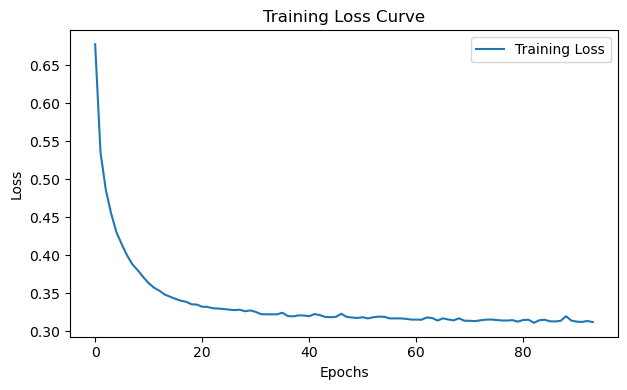

In [74]:
loss_values = history.loss_curve_

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Saving the model for Deployment

In [75]:
# Saving the standard scaler
joblib.dump(sc, 'scaler.pkl')

print("Scaler saved successfully.")

Scaler saved successfully.


In [76]:
joblib.dump(mlp, 'human_attrition.joblib')

print("Model saved successfully.")

Model saved successfully.


Thank You!